In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam


# Define paths
dataset_dir = './horse-or-human/horse-or-human'  # Single main directory with all images in subdirectories (train/test split handled here)


In [2]:

# Step 1: Load and Split the Dataset
# Image generators with train/test split
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 80% training, 20% testing

# Training data
train_data = data_gen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Specify as training data
)

# Test data
test_data = data_gen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation',  # Specify as validation (test) data
    shuffle=False
)


Found 822 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


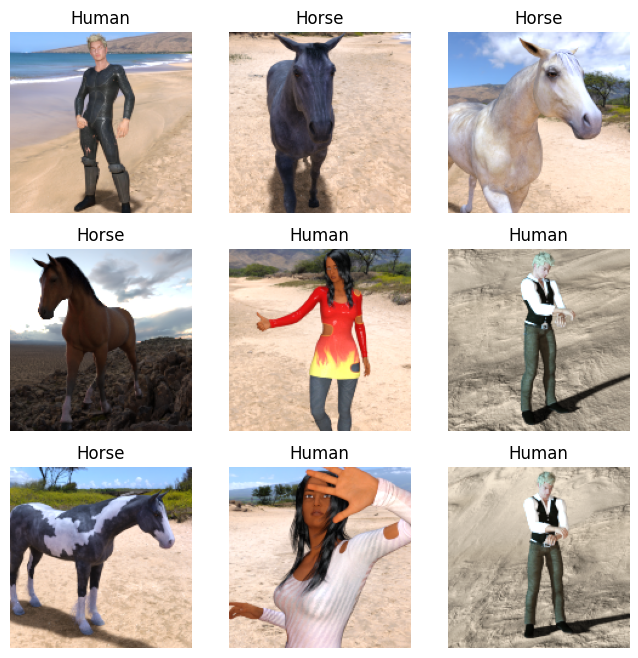

In [3]:

# Step 2: Visualize some samples
x, y = next(train_data)
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x[i])
    plt.title('Human' if y[i] == 1 else 'Horse')
    plt.axis('off')
plt.show()


In [4]:

# Step 3: Build and Fine-tune Models
def create_model(base_model, lr=0.001):
    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    opt = Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [5]:

# Load and configure ResNet base
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
resnet_base.trainable = False  # Freeze layers for feature extraction
resnet_model = create_model(resnet_base)

# Load and configure VGG16 base
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
vgg_base.trainable = False  # Freeze layers for feature extraction
vgg_model = create_model(vgg_base)


In [7]:

# Step 4: Train and Evaluate Models

# Train ResNet model
print("Training ResNet Model:")
history_resnet = resnet_model.fit(train_data, epochs=5, validation_data=test_data)
resnet_loss, resnet_acc = resnet_model.evaluate(test_data)


Training ResNet Model:
Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.5381 - loss: 1.4329 - val_accuracy: 0.6293 - val_loss: 0.6151
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7325 - loss: 0.5149 - val_accuracy: 0.8390 - val_loss: 0.5030
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8648 - loss: 0.4213 - val_accuracy: 0.5366 - val_loss: 0.5696
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.8644 - loss: 0.3410 - val_accuracy: 0.8732 - val_loss: 0.4048
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9076 - loss: 0.2909 - val_accuracy: 0.5122 - val_loss: 0.6582
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7437 - loss: 0.3660


In [6]:

# Train VGG model
print("\nTraining VGG Model:")
history_vgg = vgg_model.fit(train_data, epochs=5, batch_size=64, validation_data=test_data)
vgg_loss, vgg_acc = vgg_model.evaluate(test_data)



Training VGG Model:
Epoch 1/5


C:\Users\Sanju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 137s 5s/step - accuracy: 0.6860 - loss: 0.8009 - val_accuracy: 0.8244 - val_loss: 0.3861
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 126s 5s/step - accuracy: 0.9908 - loss: 0.0293 - val_accuracy: 0.7854 - val_loss: 0.5808
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 123s 5s/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 0.8049 - val_loss: 0.5703
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 125s 5s/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.7902 - val_loss: 0.6184
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 126s 5s/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.7902 - val_loss: 0.6250
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.9105 - loss: 0.2888


7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step


<Figure size 500x500 with 0 Axes>

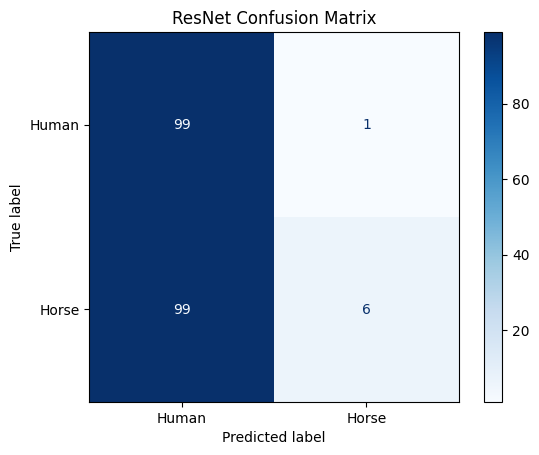

7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step


<Figure size 500x500 with 0 Axes>

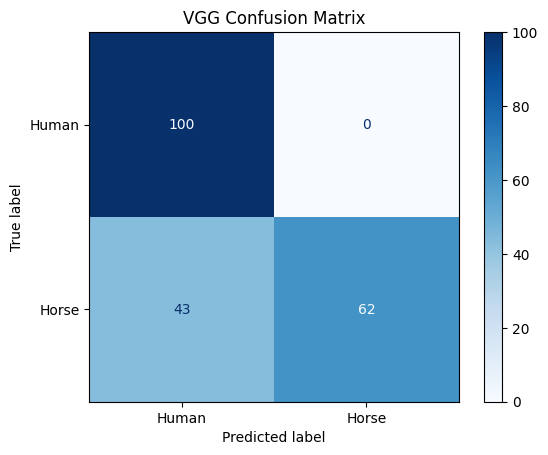

ResNet Model - Test Accuracy: 0.51, Test Loss: 0.66
VGG Model - Test Accuracy: 0.79, Test Loss: 0.62


In [8]:

# Step 5: Report Results with Confusion Matrices
def plot_confusion_matrix(model, data, title):
    # Get predictions
    predictions = (model.predict(data) > 0.5).astype("int32")
    
    # Get true labels
    true_labels = data.classes
    
    # Calculate confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    
    # Plot confusion matrix
    plt.figure(figsize=(5, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Human", "Horse"])
    disp.plot(cmap="Blues")
    plt.title(f"{title} Confusion Matrix")
    plt.show()

plot_confusion_matrix(resnet_model, test_data, "ResNet")
plot_confusion_matrix(vgg_model, test_data, "VGG")

# Print final accuracy and loss for both models
print(f"ResNet Model - Test Accuracy: {resnet_acc:.2f}, Test Loss: {resnet_loss:.2f}")
print(f"VGG Model - Test Accuracy: {vgg_acc:.2f}, Test Loss: {vgg_loss:.2f}")
